## **Task 1.1: FIFA 22 Data Processing**
**Dataset:** [FIFA 22 Player Dataset](fifa22.csv)  

### **Steps to Perform:**


- 🔹 **Remove** the `Long Name` column.
- 🔹 **Convert** the `Short Name` column to lowercase.
- 🔹 **Retrieve** the **10 most valuable players**.
- 🔹 **Plot** the counts of `Overall` and `Potential` columns.
- 🔹 **Find underrated players** by analyzing:
  - `Potential/Wage per week`
  - `Value/Wage per week`
  - 💡 *Suggest any other metric for finding underrated players.*
- 🔹 **Convert** `Height` from **cm to meters**.
- 🔹 **Save** the dataset in **CSV and Parquet format**.
- 🔹 **Write a short note** on **CSV vs Parquet** in the README (Use ChatGPT for reference but write in your own words).
  

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [89]:
df = pd.read_csv("fifa22.csv")
clean_df = df.dropna()
clean_df.head()

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,170
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,185
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,187
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,175
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181


In [90]:
#drop column

clean_df = clean_df.drop("long_name", axis = 1)
clean_df.head()

,sofifa_id,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm
0,158023,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,170
1,188545,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185
2,20801,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,187
3,190871,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,175
4,192985,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181


In [91]:
#astype -> used to check for NaN values
clean_df["short_name"] = clean_df["short_name"].astype(str).str.lower()
clean_df.head()

,sofifa_id,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm
0,158023,l. messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,170
1,188545,r. lewandowski,ST,92,92,119500000.0,270000.0,32,185
2,20801,cristiano ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,187
3,190871,neymar jr,"LW, CAM",91,91,129000000.0,270000.0,29,175
4,192985,k. de bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181


In [92]:
#Retrieve 10 most valuable players
sorted_df = clean_df.sort_values("value_eur", ascending = False)
sorted_df.head(10)

,sofifa_id,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm
6,231747,k. mbappé,"ST, LW",91,95,194000000.0,230000.0,22,182
29,239085,e. haaland,ST,88,93,137500000.0,110000.0,20,194
9,202126,h. kane,ST,90,90,129500000.0,240000.0,27,188
3,190871,neymar jr,"LW, CAM",91,91,129000000.0,270000.0,29,175
4,192985,k. de bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181
21,230621,g. donnarumma,GK,89,93,119500000.0,110000.0,22,196
1,188545,r. lewandowski,ST,92,92,119500000.0,270000.0,32,185
43,228702,f. de jong,"CM, CDM, CB",87,92,119500000.0,210000.0,24,180
45,233049,j. sancho,"RM, CF, LM",87,91,116500000.0,150000.0,21,180
44,231281,t. alexander-arnold,RB,87,92,114000000.0,150000.0,22,180


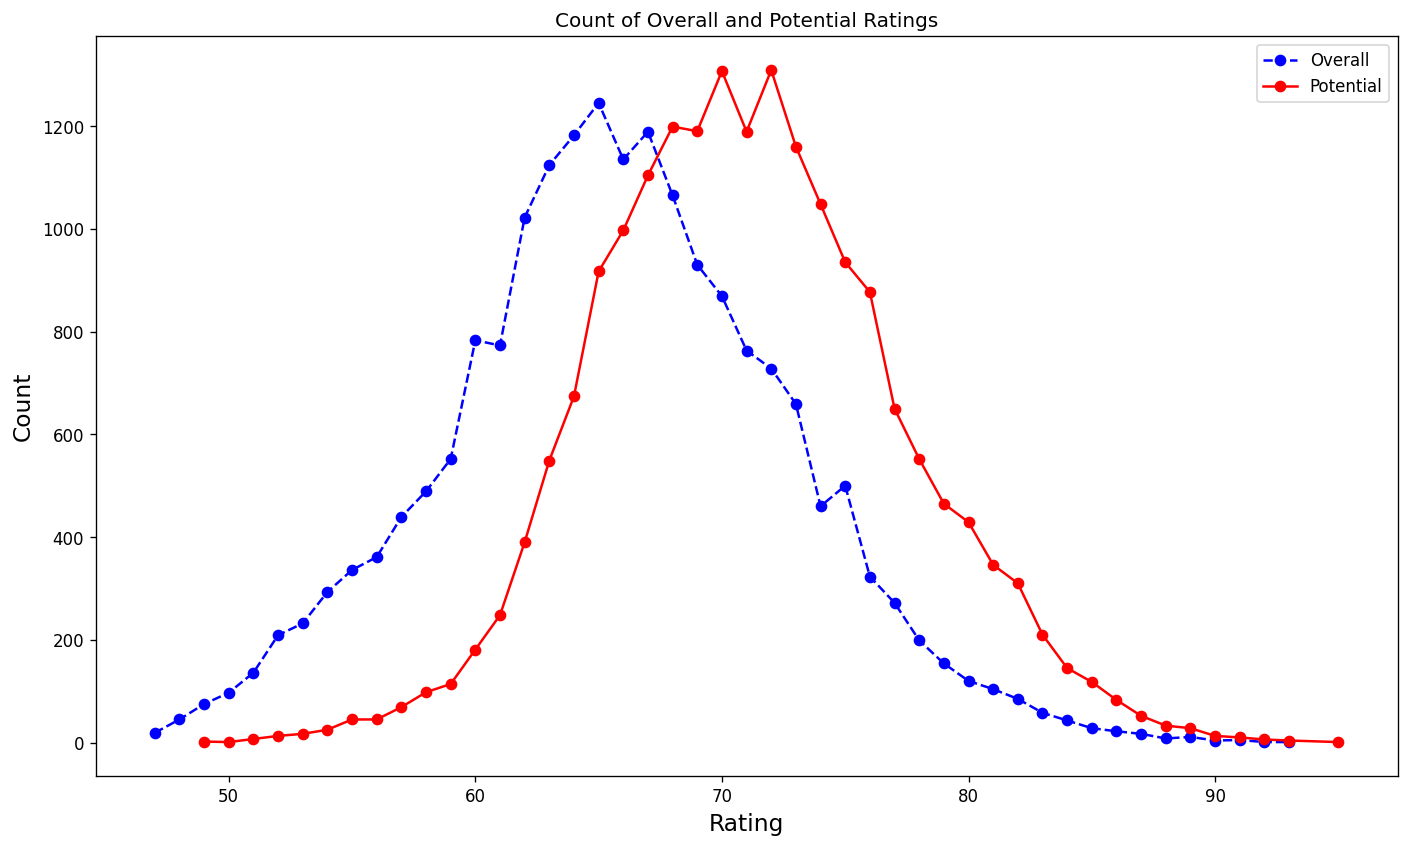

In [93]:
#plotting graph
overall_by_number = clean_df.groupby("overall").count()
potential_by_number = clean_df.groupby("potential").count()
potential_by_number["sofifa_id"]

plt.figure(figsize = (14,8), dpi = 120)
plt.title("Count of Overall and Potential Ratings")
plt.xlabel("Rating", fontsize = 14)
plt.ylabel("Count", fontsize = 14)

plt.plot(overall_by_number.index, overall_by_number["sofifa_id"],color = "blue", 
         linestyle = "--", marker = "o", label = "Overall")
plt.plot(potential_by_number.index,potential_by_number["sofifa_id"], color = "red", 
         marker = "o", label = "Potential")

plt.legend()
plt.show()

In [99]:
#Find underrated players

clean_df["pot_wage_ratio"] = clean_df["potential"]/clean_df["wage_eur"]
clean_df["val_wage_ratio"] = clean_df["value_eur"]/clean_df["wage_eur"]
clean_df.replace([np.inf,-np.inf], np.nan, inplace = True)
clean_df.dropna(subset = ["pot_wage_ratio", "val_wage_ratio"], inplace = True)

underrated_by_potential = clean_df.sort_values("pot_wage_ratio", ascending = False)
underrated_by_value = clean_df.sort_values(by='val_wage_ratio', ascending=False)

print("Top 10 Underrated Players by Potential to Wage Ratio:")
print(underrated_by_potential[['short_name', 'potential', 'wage_eur', 'pot_wage_ratio']].head(10))

print("\nTop 10 Underrated Players by Value to Wage Ratio:")
print(underrated_by_value[['short_name', 'value_eur', 'wage_eur', 'val_wage_ratio']].head(10))

Top 10 Underrated Players by Potential to Wage Ratio:
            short_name  potential  wage_eur  pot_wage_ratio
1450         a. hložek         87     500.0           0.174
7335      k. kozłowski         85     500.0           0.170
7454           s. biuk         85     500.0           0.170
3825       m. vušković         85     500.0           0.170
10992   a. schjelderup         84     500.0           0.168
6389          m. bulat         84     500.0           0.168
4575        a. karabec         84     500.0           0.168
10941    b. verbruggen         83     500.0           0.166
8483       k. tzolakis         83     500.0           0.166
16303  r. van den berg         83     500.0           0.166

Top 10 Underrated Players by Value to Wage Ratio:
         short_name   value_eur  wage_eur  val_wage_ratio
282    d. livaković  35000000.0    1000.0    35000.000000
506    v. tsygankov  33500000.0    1000.0    33500.000000
1450      a. hložek  16000000.0     500.0    32000.000000
145

Another way we can measure underrated players is by looking at the **age to potential ratio**. Young players with high potential but low market value can be considered underrated.


In [100]:
# changing cm to m

clean_df["height_cm"] = clean_df["height_cm"]/100
clean_df = clean_df.rename(columns={"height_cm" : "height_m"})
clean_df.head()

,sofifa_id,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_m,pot_wage_ratio,val_wage_ratio
0,158023,l. messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,1.70,0.000291,243.750000
1,188545,r. lewandowski,ST,92,92,119500000.0,270000.0,32,1.85,0.000341,442.592593
2,20801,cristiano ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,1.87,0.000337,166.666667
3,190871,neymar jr,"LW, CAM",91,91,129000000.0,270000.0,29,1.75,0.000337,477.777778
4,192985,k. de bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1.81,0.000260,358.571429


In [103]:
#saving as csv and parquet

df.to_csv("csvfifa.csv")
df.to_parquet("parafifa.parquet")

## **Task 1.2: Budget-Constrained Player Selection**
### **Objective:**  
A manager needs a **good player within a budget**.  

### **Steps to Perform:**
- 🔹 **Build an application** that:
  - Takes **player position** and **annual budget cap** as inputs.
  - Returns **names, potential, and value** of players who fit.
  - Sorts them by **overall rating**.

In [105]:
def find_good_players(player_pos, budget_cap):

    filter_df = clean_df[clean_df["player_positions"].astype(str).str.contains(player_pos)]

    affordable_players = filter_df[filter_df["value_eur"] <= budget_cap]

    sorted_df = affordable_players.sort_values("overall", ascending = False)

    final_df = sorted_df[["short_name", "overall", "potential", "value_eur", "wage_eur"]]

    return final_df


## **Task 1.3: Data Scaling for Model Training**
### **Objective:**  
Data should be scaled for training models.

### **Steps to Perform:**
- 🔹 **Use Standard Scaler** to scale the dataset to:
  - **0 to 1** or **-1 to 1**.
- 🔹 **Save the scaled dataset** as `scaled_processed.csv`.


In [120]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1))
data_toscale = clean_df.select_dtypes(include=[float, int])
scaled_data = scaler.fit_transform(data_toscale)
scaled_df = pd.DataFrame(scaled_data, columns = data_toscale.columns)

scaled_df.to_csv("scaled_processed.csv", index = False)